In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np

from skimage import io

from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth

import glob

In [2]:
data = os.listdir("image_samples_resized")

In [3]:
newlist = []
for photos in data:
    if photos.endswith(".jpg"):
        newlist.append(photos)
print(newlist)

['urban_w_1_resized.jpg', 'animal_7_resized.jpg', 'promo_9_resized.jpg', 'object_7_resized.jpg', 'meme_7_resized.jpg', 'building_6_resized.jpg', 'quote_5_resized.jpg', 'candid_8_resized.jpg', 'selfie_1_resized.jpg', 'art_4_resized.jpg', 'landscape_w_5_resized.jpg', 'food_4_resized.jpg', 'body_6_resized.jpg', 'selfie_8_resized.jpg', 'candid_1_resized.jpg', 'urban_wo_4_resized.jpg', 'group_5_resized.jpg', 'art_1_resized.jpg', 'promo_5_resized.jpg', 'urban_wo_1_resized.jpg', 'candid_4_resized.jpg', 'quote_9_resized.jpg', 'body_3_resized.jpg', 'food_1_resized.jpg', 'object_2_resized.jpg', 'meme_2_resized.jpg', 'landscape_wo_2_resized.jpg', 'animal_2_resized.jpg', 'art_8_resized.jpg', 'urban_w_4_resized.jpg', 'selfie_4_resized.jpg', 'group_9_resized.jpg', 'food_8_resized.jpg', 'building_3_resized.jpg', 'body_9_resized.jpg', 'selfie_7_resized.jpg', 'quote_3_resized.jpg', 'animal_1_resized.jpg', 'object_1_resized.jpg', 'meme_1_resized.jpg', 'landscape_wo_1_resized.jpg', 'food_2_resized.jpg', 

In [4]:
# get list of images
#img = glob.glob("image_sample_copy/animal_images/*.jpg")

img = []
for d in newlist:
    img.append(io.imread("image_samples_resized/" +d).mean(axis=2).flatten())

In [5]:
img = np.array(img)
img.shape

(138, 51623)

In [6]:
img

array([[ 69.66666667,  63.        ,   4.66666667, ...,  66.66666667,
         82.        , 127.33333333],
       [149.66666667, 160.66666667, 153.66666667, ...,  47.        ,
         45.        ,  50.66666667],
       [ 43.        ,  43.        ,  43.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [173.33333333, 139.66666667,  57.66666667, ..., 111.        ,
         84.        ,  39.        ],
       [234.        , 234.        , 234.        , ..., 242.        ,
        241.        , 244.        ],
       [ 32.33333333,  17.        ,  24.66666667, ..., 108.66666667,
         39.33333333,  45.33333333]])

In [7]:
m,n = 209,247

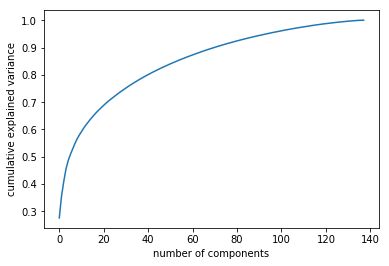

In [8]:
pca = PCA().fit(img)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
sklearn_pca = PCA(n_components=30, random_state=4)
Y_sklearn = sklearn_pca.fit_transform(img)

In [10]:
sklearn_pca.components_.shape

(30, 51623)

In [11]:
Y_sklearn

array([[  5371.24025899,  -1346.60550346,   -725.19363517, ...,
           535.22523224,   -253.60209209,  -2494.65774223],
       [ -5075.5364205 ,  -2585.02604179,  -2586.32010772, ...,
           639.66928593,    147.19873663,   -442.29694247],
       [ -1612.22786219,   6096.30894312, -10813.58784193, ...,
          -864.41153532,    804.37731581,    635.03708173],
       ...,
       [ -3148.79585935,  -8748.24784796,   -210.53167776, ...,
          1511.61284801,   1582.93441325,   -560.01934068],
       [-18670.95727699,   3765.03577189,   1712.32807905, ...,
          -712.69894223,   4232.3762534 ,    751.02871403],
       [  3427.52731269,   5501.47101002,  -3087.62723509, ...,
         -2948.76009865,  -1584.54471562,   -615.97732439]])

In [12]:
Y_sklearn.shape

(138, 30)

IndexError: list index out of range

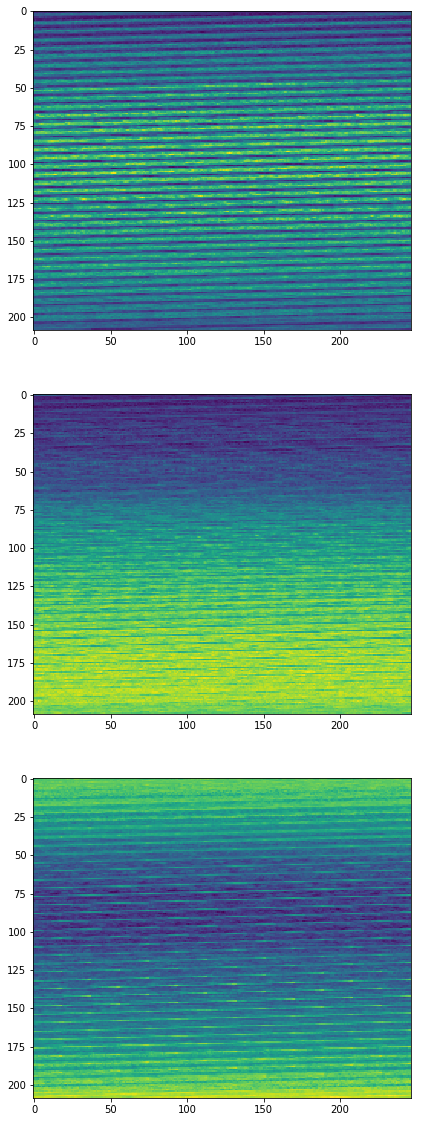

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(40, 20))

ax = [ax1,ax2,ax3]

for i in range(0,sklearn_pca.get_params()['n_components']):
    ax[i].imshow(sklearn_pca.components_[i,:].reshape(m,n))

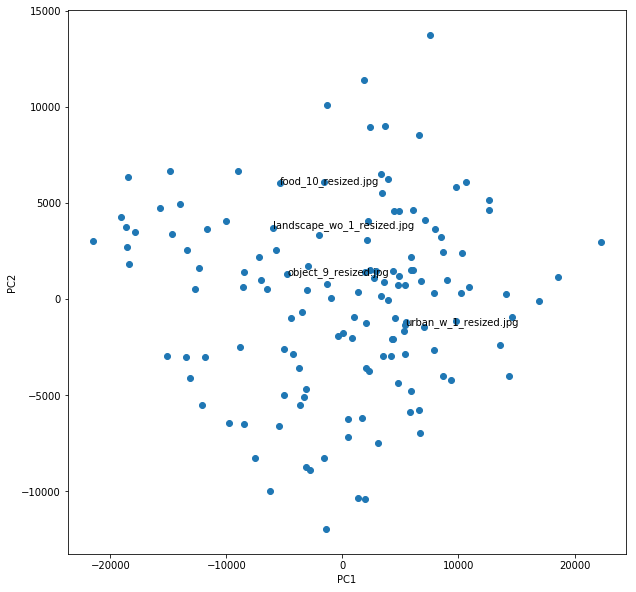

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.scatter(Y_sklearn[:,0],Y_sklearn[:,1])


# add labels to some of the points so we can manually go and check them to see differences
for i, txt in enumerate(newlist):
    if(i%40 == 0):
        ax.annotate(txt, (Y_sklearn[i,0],Y_sklearn[i,1]))

In [15]:
bandwidth = estimate_bandwidth(Y_sklearn, quantile=0.2, n_samples=500)
bandwidth

15608.142751830306

In [16]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms

MeanShift(bandwidth=15608.142751830306, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [17]:
ms.fit(Y_sklearn)

MeanShift(bandwidth=15608.142751830306, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [18]:
print(len(np.unique(ms.labels_)))

2


In [19]:
ms.cluster_centers_

array([[ 2.51755492e+03, -8.98117820e+02, -2.59692428e+02,
        -1.66909040e+02, -3.70555657e+01,  2.43784819e+02,
         3.34425529e+01,  3.15505995e+01, -3.93067601e+01,
        -5.39034161e+01, -6.58085601e+01, -4.52187532e+01,
         2.97147356e+01, -5.10813986e+00, -1.78988958e+01,
        -7.62783841e+01,  5.30264111e+01,  2.86702600e+01,
        -3.10857631e+01, -8.31062008e+01, -1.56905616e+02,
        -6.22149214e+01, -1.10110050e+02,  6.39446442e+01,
        -8.31657035e+01, -5.99348064e+01,  6.91510674e+01,
         3.67181005e+01, -2.58596461e+01, -5.47693629e+01],
       [-7.15525830e+03,  2.19855955e+03, -1.00141019e+03,
         1.06433388e+04,  8.62863403e+03, -6.26565417e+02,
        -5.00113495e+02,  5.27899281e+03, -3.74441324e+03,
        -2.33504799e+03,  4.61442443e+03,  8.56093072e+01,
        -1.04068242e+03, -2.00191413e+02, -2.28501132e+03,
         2.68488700e+03,  2.29985923e+03, -1.97300845e+03,
         2.63692285e+03, -1.03465636e+03,  1.49015178e+

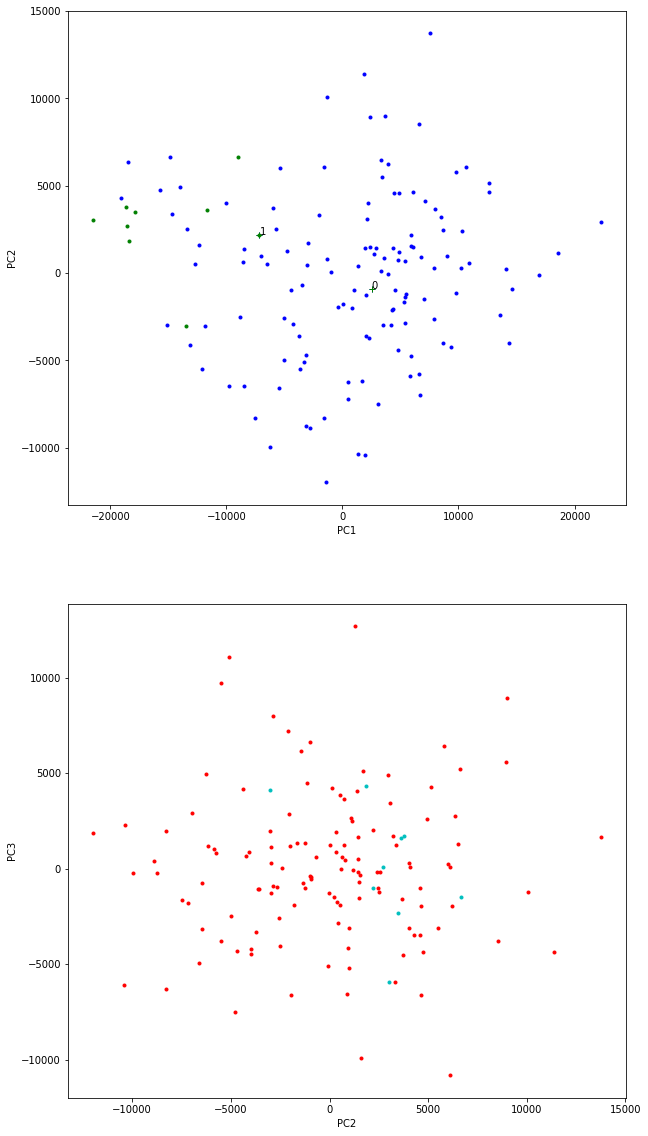

In [20]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[ms.labels_==i,0],Y_sklearn[ms.labels_==i,1],c+'.')
    ax1.plot(ms.cluster_centers_[:,0],ms.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (ms.cluster_centers_[i,0]+10,ms.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[ms.labels_==i,1],Y_sklearn[ms.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")


In [21]:
from sklearn.cluster import KMeans    

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Y_sklearn)

In [23]:
kmeans.labels_

array([1, 3, 1, 1, 0, 2, 0, 1, 1, 0, 3, 1, 3, 0, 3, 3, 2, 1, 0, 1, 1, 1,
       2, 3, 0, 3, 3, 3, 1, 1, 1, 3, 0, 3, 0, 3, 3, 1, 0, 1, 3, 1, 2, 2,
       1, 3, 3, 0, 3, 2, 3, 1, 3, 3, 2, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 2, 3, 1, 2, 3, 2, 1, 1, 3, 0, 0, 2, 3, 0, 1, 0, 1, 0, 2, 1, 3,
       1, 3, 1, 2, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       3, 0, 3, 1, 2, 1, 1, 1, 0, 1, 3, 0, 2, 3, 2, 3, 3, 1, 3, 1, 3, 2,
       1, 1, 1, 3, 0, 1], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[-1.37061095e+04,  2.14539793e+03,  3.30284068e+02,
         6.29164009e+02,  6.29178539e+02, -2.02499051e+02,
        -1.36444770e+02, -1.29101470e+02,  2.61806734e+02,
        -5.77914430e+02, -3.13270749e+01, -2.06489902e+02,
         1.47400686e+01, -1.30822900e+01,  1.97583019e+02,
         9.99101266e+01,  3.04573708e+02, -1.85177023e+02,
        -8.62652780e+01, -9.11815530e+01,  6.14067714e+01,
         8.07568258e+01, -1.65148956e+02,  5.90299224e+01,
         3.20762704e+02,  1.02692765e+02, -1.50839829e+02,
         6.24568904e+01,  8.56112131e+01, -4.46315374e+01],
       [ 4.66868234e+03,  2.21445038e+03,  2.46149533e+02,
        -1.08043021e+03, -6.80059045e+01, -1.33430988e+02,
         1.08513354e+01,  5.64357547e+01, -4.22823875e+01,
         3.43167362e+02, -2.04604572e+02, -7.94509964e+01,
        -1.31359624e+02,  1.11653629e+02,  6.68050390e+01,
        -1.15535908e+02, -1.50443819e+02,  1.42972419e+01,
         1.32944587e+02,  2.86744673e+02,  1.19146762e+

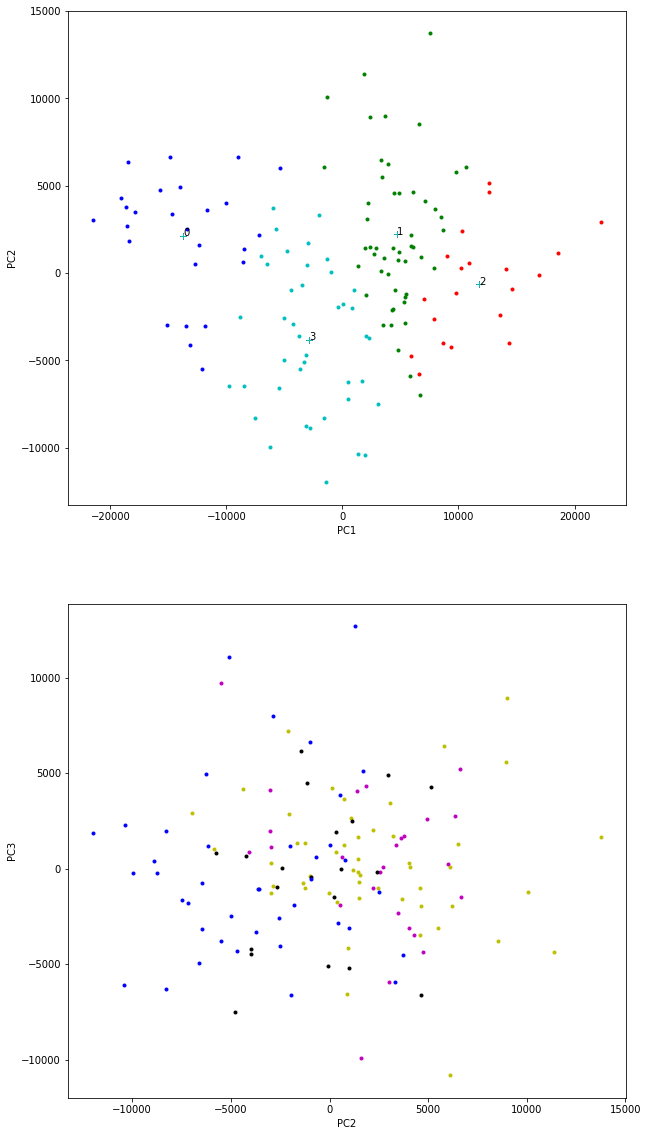

In [25]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[kmeans.labels_==i,0],Y_sklearn[kmeans.labels_==i,1],c+'.')
    ax1.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (kmeans.cluster_centers_[i,0]+10,kmeans.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[kmeans.labels_==i,1],Y_sklearn[kmeans.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")

In [26]:
import pandas as pd
df = pd.DataFrame()

In [27]:
df["image"] = newlist
#df['pca_components'] = Y_sklearn
df['k_means_cluster'] = kmeans.labels_

In [28]:
df.sort_values(by='k_means_cluster', ascending=True)

,image,k_means_cluster
100,object_6_resized.jpg,0
32,food_8_resized.jpg,0
95,quote_4_resized.jpg,0
38,object_1_resized.jpg,0
99,meme_6_resized.jpg,0
101,meme_5_resized.jpg,0
84,promo_4_resized.jpg,0
24,object_2_resized.jpg,0
82,body_2_resized.jpg,0
105,selfie_10_resized.jpg,0


In [29]:
df["k_means_cluster"].value_counts()

1    51
3    41
0    26
2    20
Name: k_means_cluster, dtype: int64

In [30]:
df[df["k_means_cluster"]==0]

,image,k_means_cluster
4,meme_7_resized.jpg,0
6,quote_5_resized.jpg,0
9,art_4_resized.jpg,0
13,selfie_8_resized.jpg,0
18,promo_5_resized.jpg,0
24,object_2_resized.jpg,0
32,food_8_resized.jpg,0
34,body_9_resized.jpg,0
38,object_1_resized.jpg,0
47,art_2_resized.jpg,0


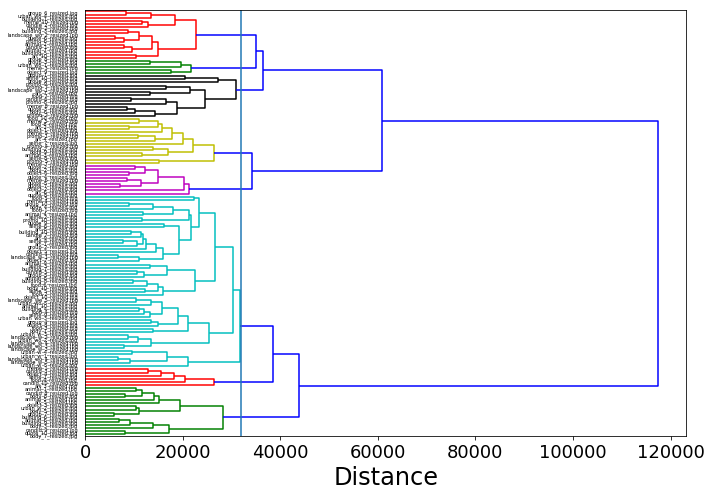

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'ward')

max_d = 32000
clusters = fcluster(linked, max_d, criterion='distance')
    
df['cluster'] = clusters

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=32000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=32000) #plot vertical line

plt.show()

In [32]:
clusters

array([3, 8, 6, 3, 5, 1, 4, 1, 2, 5, 3, 3, 6, 5, 8, 8, 3, 3, 5, 7, 3, 3,
       1, 3, 4, 8, 8, 8, 3, 3, 3, 6, 5, 8, 5, 5, 6, 1, 5, 3, 6, 3, 1, 3,
       3, 3, 7, 5, 8, 3, 6, 3, 8, 8, 1, 6, 6, 3, 8, 8, 3, 2, 3, 1, 3, 8,
       2, 3, 5, 2, 3, 7, 1, 3, 3, 8, 5, 4, 3, 7, 6, 3, 4, 3, 5, 1, 3, 3,
       3, 3, 3, 1, 5, 3, 1, 4, 3, 6, 1, 4, 4, 5, 3, 3, 1, 6, 3, 4, 3, 3,
       8, 4, 6, 2, 1, 3, 3, 3, 6, 2, 7, 5, 1, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       3, 3, 1, 8, 4, 3], dtype=int32)

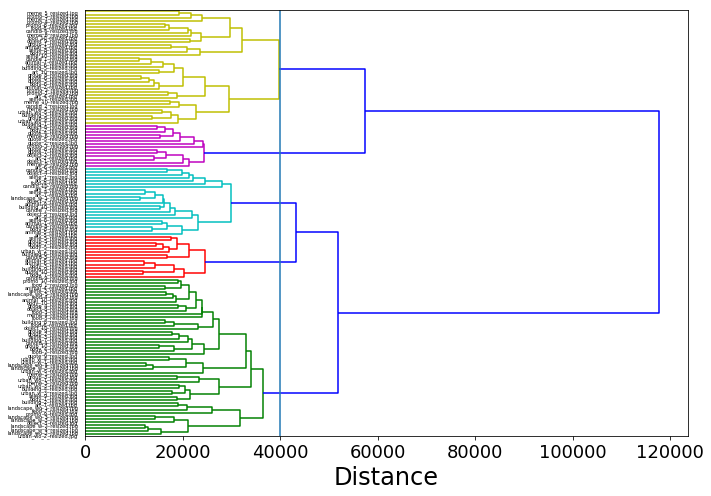

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(img, 'ward')

max_d = 40000
clusters_img = fcluster(linked, max_d, criterion='distance')
    
df['cluster_img'] = clusters_img

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=40000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=40000) #plot vertical line

plt.show()

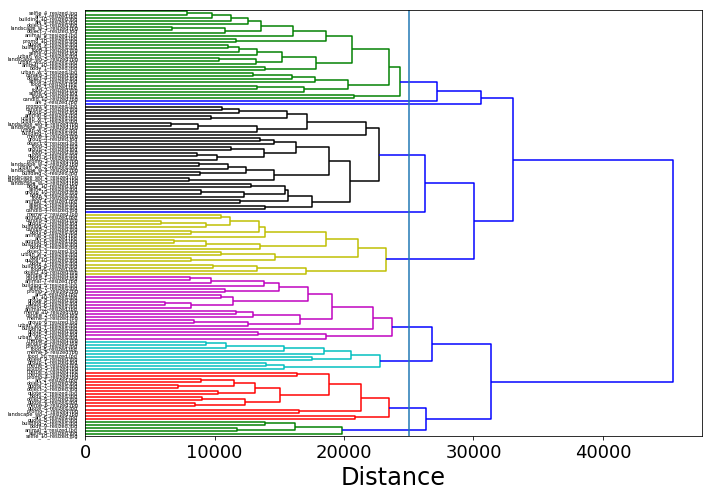

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'complete')

max_d = 25000
cluster_complete = fcluster(linked, max_d, criterion='distance')
    
df['cluster_complete'] = cluster_complete

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=25000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=25000) #plot vertical line

plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward').fit(Y_sklearn)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func=<function mean at 0x10a3092f0>)

In [37]:
clustering.labels_

array([0, 5, 2, 0, 3, 1, 7, 1, 4, 3, 0, 0, 2, 3, 5, 5, 0, 0, 3, 6, 0, 0,
       1, 0, 7, 5, 5, 5, 0, 0, 0, 2, 3, 5, 3, 3, 2, 1, 3, 0, 2, 0, 1, 0,
       0, 0, 6, 3, 5, 0, 2, 0, 5, 5, 1, 2, 2, 0, 5, 5, 0, 4, 0, 1, 0, 5,
       4, 0, 3, 4, 0, 6, 1, 0, 0, 5, 3, 7, 0, 6, 2, 0, 7, 0, 3, 1, 0, 0,
       0, 0, 0, 1, 3, 0, 1, 7, 0, 2, 1, 7, 7, 3, 0, 0, 1, 2, 0, 7, 0, 0,
       5, 7, 2, 4, 1, 0, 0, 0, 2, 4, 6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 5, 7, 0])

In [38]:
df["hierarchical_cluster(8)"] = clustering.labels_

In [39]:
from sklearn.cluster import SpectralClustering

In [40]:
spectral_clustering = SpectralClustering(n_clusters=4,
         assign_labels="discretize",
         random_state=0).fit(Y_sklearn)

df["spectral_clustering"] = spectral_clustering.labels_

spectral_clustering 

/Users/jeffreysternberg/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=4, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=0)

In [374]:
df.sort_values(by= ['cluster','image'], ascending=True)

,image,k_means_cluster,cluster,cluster_img,cluster_complete,hierarchical_cluster(8),spectral_clustering
37,animal_1_resized.jpg,1,1,3,5,1,0
104,animal_5_resized.jpg,1,1,3,5,1,0
98,animal_6_resized.jpg,2,1,2,5,1,0
91,art_5_resized.jpg,2,1,3,5,1,0
22,body_3_resized.jpg,2,1,2,5,1,1
54,body_5_resized.jpg,2,1,2,5,1,1
85,body_7_resized.jpg,2,1,2,5,1,2
134,body_8_resized.jpg,1,1,3,5,1,2
5,building_6_resized.jpg,2,1,2,5,1,2
42,building_9_resized.jpg,2,1,2,5,1,3


In [328]:
def cluster_lister(df, column):
    
    cluster_list = []
    k = df[column].max()
    x = df[column].min()
    
    k=k+1
    
    for i in range(x,k):
    
        cluster_i= df[df[column]==i].sort_values(by= 'image', ascending=True)
        cluster_i_list = cluster_i['image'].tolist()
        cluster_list.append(cluster_i_list)
        
    return cluster_list

In [329]:
hierarchical_cluster_list = cluster_lister(df, 'cluster')

In [331]:
hierarchical_cluster_list[7]

['animal_2_resized.jpg',
 'animal_7_resized.jpg',
 'art_10_resized.jpg',
 'building_1_resized.jpg',
 'building_3_resized.jpg',
 'building_5_resized.jpg',
 'candid_1_resized.jpg',
 'candid_2_resized.jpg',
 'group_6_resized.jpg',
 'group_8_resized.jpg',
 'landscape_wo_2_resized.jpg',
 'meme_10_resized.jpg',
 'meme_2_resized.jpg',
 'promo_6_resized.jpg',
 'quote_6_resized.jpg',
 'urban_wo_4_resized.jpg']

In [332]:
complete_list = cluster_lister(df, 'cluster_complete')

In [333]:
complete_list[0]

['animal_3_resized.jpg',
 'body_9_resized.jpg',
 'building_2_resized.jpg',
 'selfie_10_resized.jpg',
 'selfie_8_resized.jpg']

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img= []
for image in cluster_1:
    img.append(io.imread("image_samples_resized/" +image))
    #img = io.imread("image_samples_resized/" +image)
    #img = mpimg.imread(image)
    #plt.imshow(io.imread("image_samples_resized/" +image))

In [363]:
def image_lister(cluster_list):
    
    image_list = []
    k = len(cluster_list)
    
    for i in range(k):
        img_i = []
        for image in cluster_list[i]:
            img_i.append(io.imread("image_samples_resized/" +image))
            
        image_list.append(img_i)
            
    return image_list

In [364]:
image_list = image_lister(hierarchical_cluster_list)

In [365]:
len(image_list)

8

In [366]:
image_list[0]

[array([[[ 13,  22,   3],
         [ 12,  21,   2],
         [  9,  18,   0],
         ...,
         [ 59,  54,  50],
         [ 51,  46,  42],
         [ 33,  25,  22]],
 
        [[  9,  18,   1],
         [ 10,  19,   2],
         [  9,  18,   1],
         ...,
         [ 47,  42,  38],
         [ 36,  31,  27],
         [ 29,  21,  19]],
 
        [[  4,  13,   0],
         [  8,  16,   1],
         [  9,  17,   2],
         ...,
         [ 31,  26,  22],
         [ 17,  12,   8],
         [ 14,   6,   4]],
 
        ...,
 
        [[ 31,  41,  68],
         [ 31,  41,  68],
         [ 31,  41,  68],
         ...,
         [122, 115,  71],
         [104,  97,  53],
         [112, 103,  62]],
 
        [[ 30,  40,  67],
         [ 30,  40,  67],
         [ 30,  40,  67],
         ...,
         [118, 111,  67],
         [ 76,  69,  25],
         [129, 120,  79]],
 
        [[ 30,  40,  67],
         [ 30,  40,  67],
         [ 30,  40,  67],
         ...,
         [111, 104,  62],
  

In [367]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [378]:
len(image_list[0])

16

In [379]:
len(cluster_list[0])

16

In [229]:
show_images(img, cols = 3, titles = cluster_1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [375]:
def image_cluster_viewer(image_list, cluster_list):
    
    k = len(image_list)
    
    for i in k:
        return show_images(image_list[i], cols = 3, titles = cluster_list[i])

In [376]:
image_list[0]

[array([[[ 13,  22,   3],
         [ 12,  21,   2],
         [  9,  18,   0],
         ...,
         [ 59,  54,  50],
         [ 51,  46,  42],
         [ 33,  25,  22]],
 
        [[  9,  18,   1],
         [ 10,  19,   2],
         [  9,  18,   1],
         ...,
         [ 47,  42,  38],
         [ 36,  31,  27],
         [ 29,  21,  19]],
 
        [[  4,  13,   0],
         [  8,  16,   1],
         [  9,  17,   2],
         ...,
         [ 31,  26,  22],
         [ 17,  12,   8],
         [ 14,   6,   4]],
 
        ...,
 
        [[ 31,  41,  68],
         [ 31,  41,  68],
         [ 31,  41,  68],
         ...,
         [122, 115,  71],
         [104,  97,  53],
         [112, 103,  62]],
 
        [[ 30,  40,  67],
         [ 30,  40,  67],
         [ 30,  40,  67],
         ...,
         [118, 111,  67],
         [ 76,  69,  25],
         [129, 120,  79]],
 
        [[ 30,  40,  67],
         [ 30,  40,  67],
         [ 30,  40,  67],
         ...,
         [111, 104,  62],
  

In [377]:
cluster_list[0]

['animal_1_resized.jpg',
 'animal_5_resized.jpg',
 'animal_6_resized.jpg',
 'art_5_resized.jpg',
 'body_3_resized.jpg',
 'body_5_resized.jpg',
 'body_7_resized.jpg',
 'body_8_resized.jpg',
 'building_6_resized.jpg',
 'building_9_resized.jpg',
 'candid_8_resized.jpg',
 'candid_9_resized.jpg',
 'group_7_resized.jpg',
 'object_3_resized.jpg',
 'quote_10_resized.jpg',
 'urban_w_2_resized.jpg']